In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('..\spreadsheet_data\i16WB_filtered.csv')

# Filter out slabs that were replaced during time period
df = df[df['Replaced'].notnull() == False]
df = df[df['Replaced and Broken'].notnull() == False]
df = df[df['2014'] != 'R']
df = df.drop(columns=['Replaced', 'Replaced and Broken', 'Interstate', 'Direction', 'Year Replaced', 'Possibly OR'])


df.to_csv('..\spreadsheet_data\i16WB_res.csv')

In [27]:
freq = {}
for year in range(2014, 2019):
    freq[year] = pd.crosstab(df[str(year)], 'count')
    #rel_freq[year].sort_values('state')

rel_freq2014 = df['2014'].value_counts(normalize=True)


"""
rel_freq2015 = df['2015'].value_counts(normalize=True)
rel_freq2016 = df['2016'].value_counts(normalize=True)
rel_freq2017 = df['2017'].value_counts(normalize=True)
rel_freq2018 = df['2018'].value_counts(normalize=True)
"""
freq[2014].head()
two_way_freq = pd.concat([freq[2014], freq[2015], freq[2016], freq[2017], freq[2018]], axis=1)
two_way_freq.columns = ['2014', '2015', '2016', '2017', '2018']
two_way_freq = two_way_freq.reindex(['NC', 'L1', 'T1', 'L2', 'T2', 'CC', 'SS'])
# display(rel_freq[2014])
# display(rel_freq[2015])
# display(rel_freq[2016])
# display(rel_freq[2017])
# display(rel_freq[2018])
display(two_way_freq)

,2014,2015,2016,2017,2018
NC,2189,2099,2023,1936,1886
L1,95,91,80,81,54
T1,20,25,36,47,29
L2,110,117,130,135,146
T2,147,181,215,245,283
CC,45,47,52,58,65
SS,140,186,210,244,283


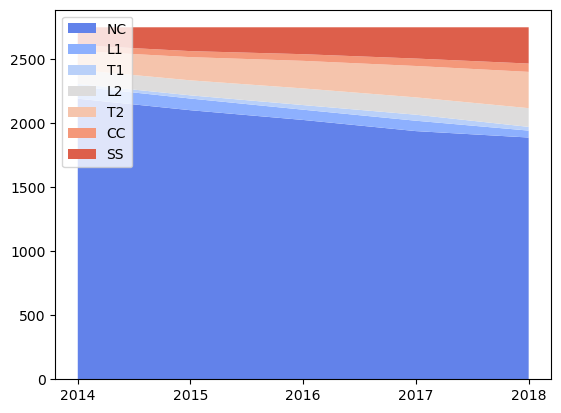

In [48]:
years = ['2014', '2015', '2016', '2017', '2018']
labels = ['NC', 'L1', 'T1', 'L2', 'T2', 'CC', 'SS']
colors = sns.color_palette('coolwarm', n_colors=7)
plt.stackplot(years, two_way_freq, labels=labels, colors=colors)
plt.legend(loc='upper center')